In [1]:
# 0) Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Make sure output dir exists before saving any plot
os.makedirs("../results/figures", exist_ok=True)

In [3]:
# 1) Load
df = pd.read_csv("../data/Telco-Customer-Churn.csv")

In [4]:
# 2) Telco-specific cleaning: TotalCharges & blanks
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', np.nan), errors='coerce')
df = df.dropna(subset=['TotalCharges'])  # or impute if you prefer

In [5]:
# 3) Quick looks
display(df.head())
df.info()
display(df.describe())
display(df.isnull().sum())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

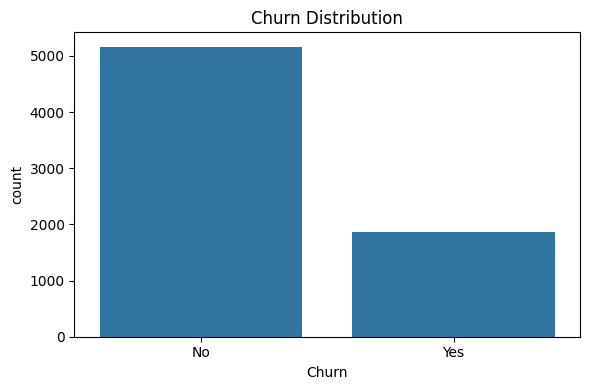

In [6]:
# 4) Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.tight_layout()
plt.savefig("../results/figures/churn_distribution.png")
plt.show()

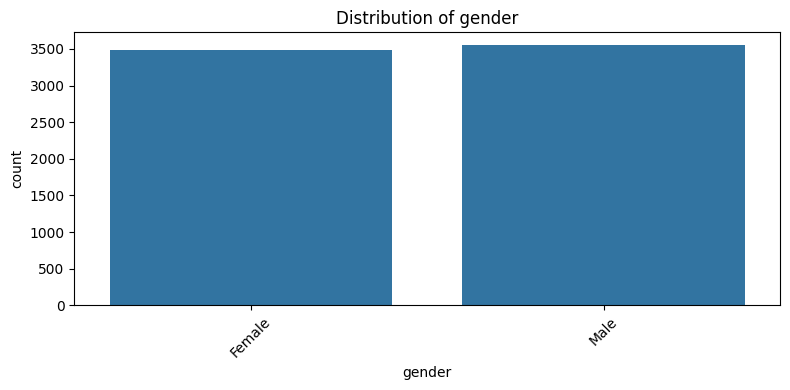

gender
Male      3549
Female    3483
Name: count, dtype: int64 



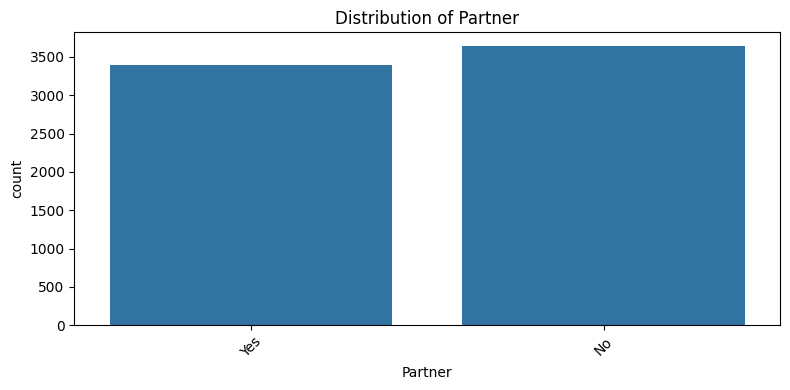

Partner
No     3639
Yes    3393
Name: count, dtype: int64 



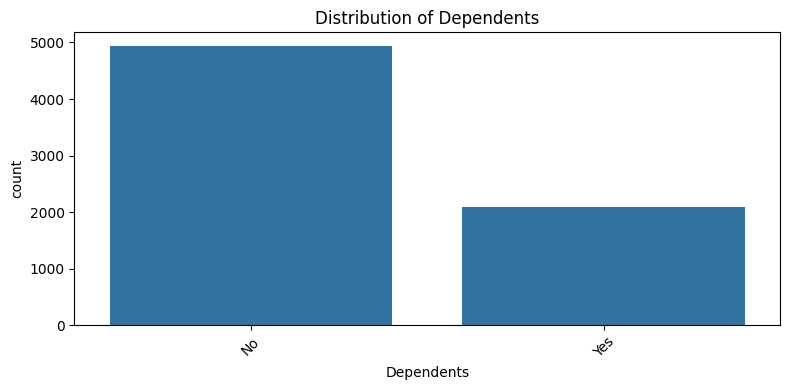

Dependents
No     4933
Yes    2099
Name: count, dtype: int64 



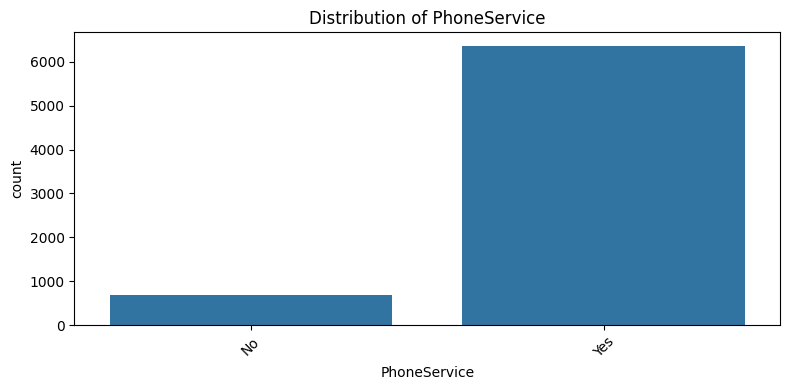

PhoneService
Yes    6352
No      680
Name: count, dtype: int64 



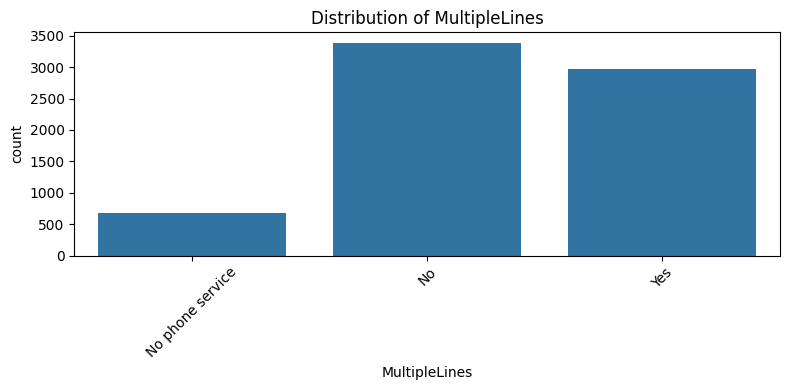

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 



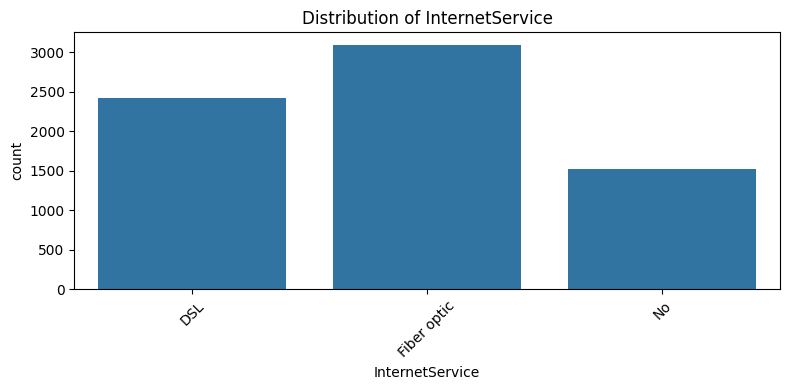

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 



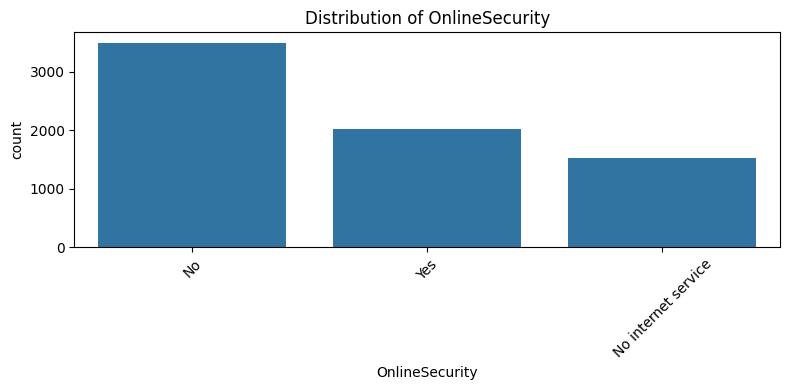

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64 



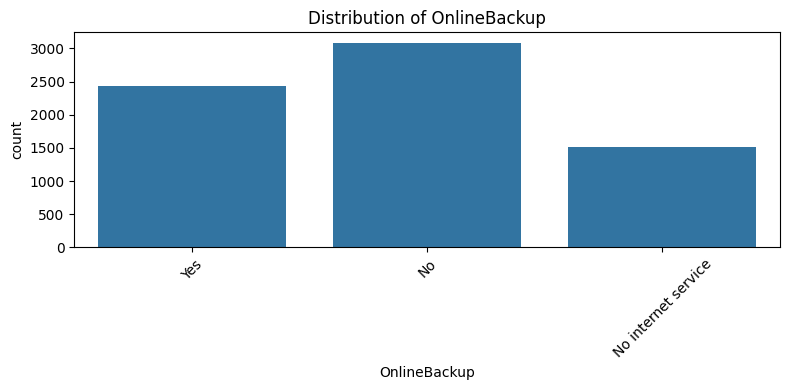

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64 



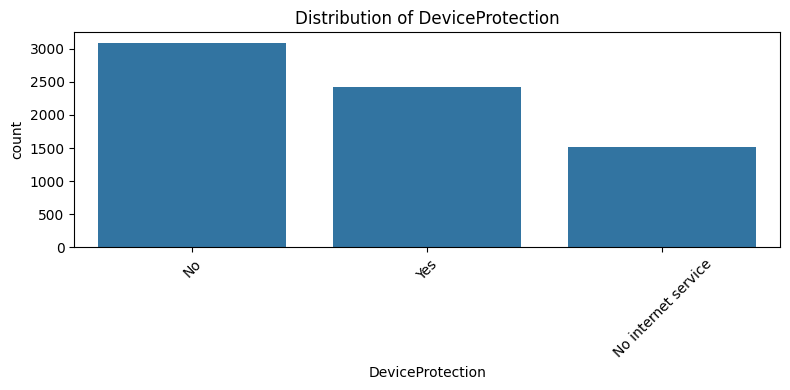

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64 



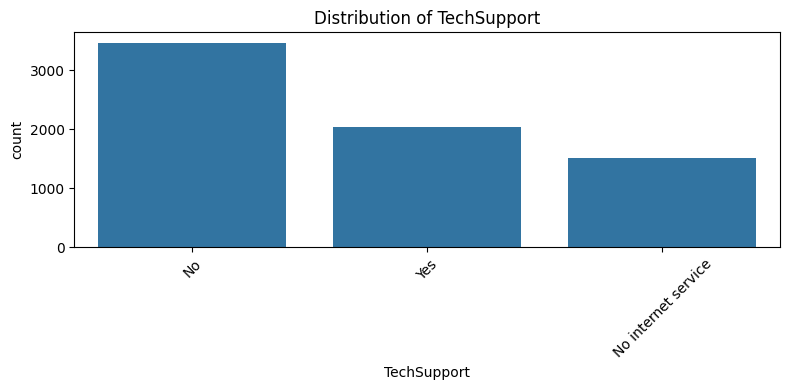

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64 



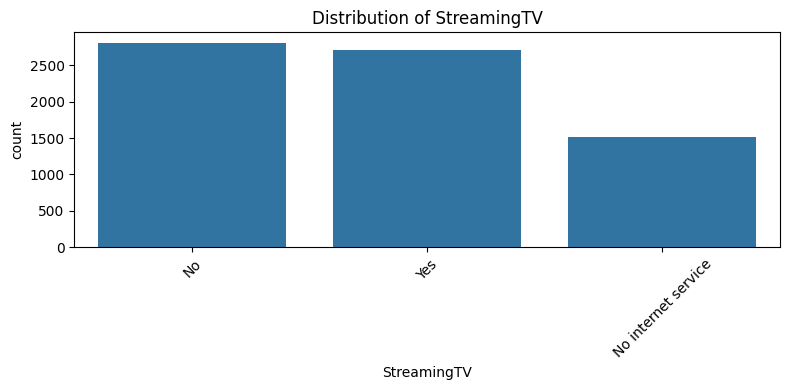

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64 



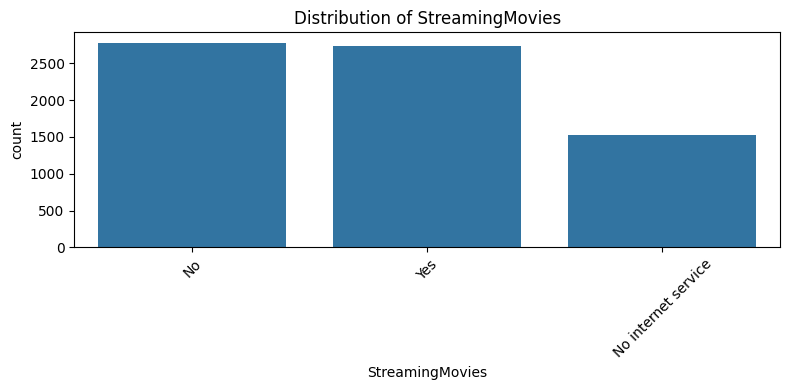

StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64 



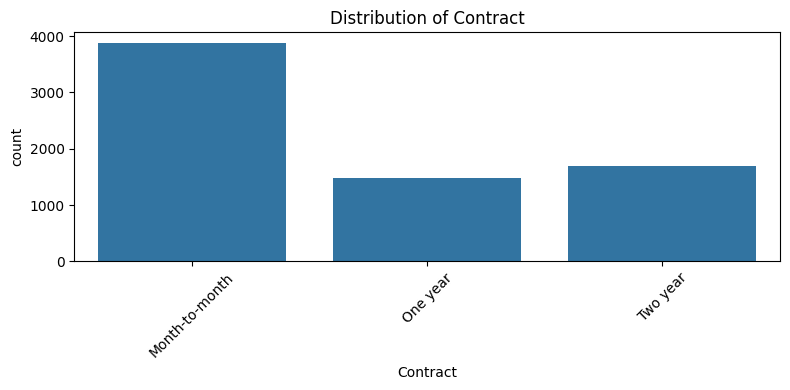

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64 



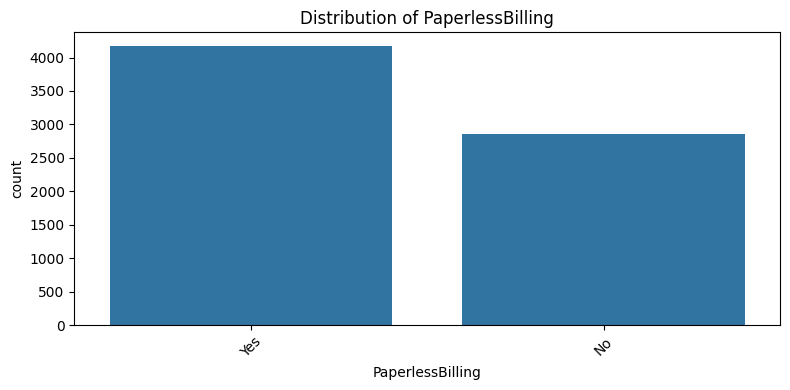

PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64 



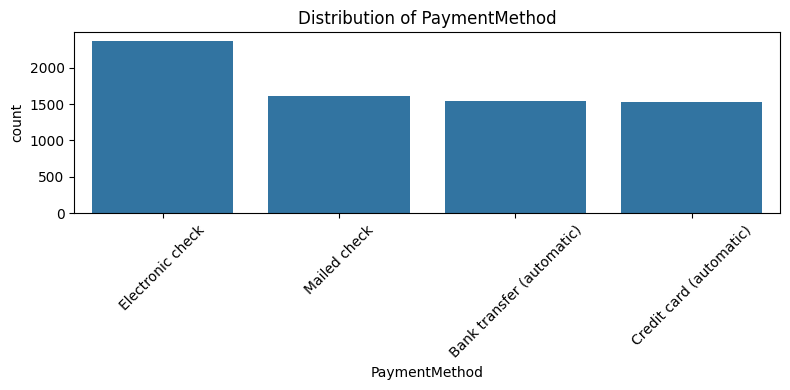

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64 



In [7]:
# 5) Categorical distributions
cat_cols = df.select_dtypes(include='object').columns
exclude_cols = ['customerID', 'Churn', 'TotalCharges']  # TotalCharges is numeric now anyway
cat_cols_to_plot = [c for c in cat_cols if c not in exclude_cols]

for col in cat_cols_to_plot:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"../results/figures/{col}_distribution.png")
    plt.show()
    print(df[col].value_counts(), "\n")

In [8]:
# 6) Numeric features
numeric_cols = df.select_dtypes(include=np.number).columns

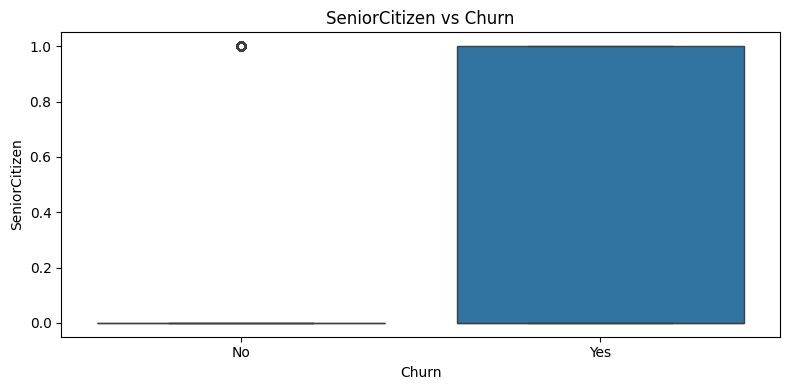

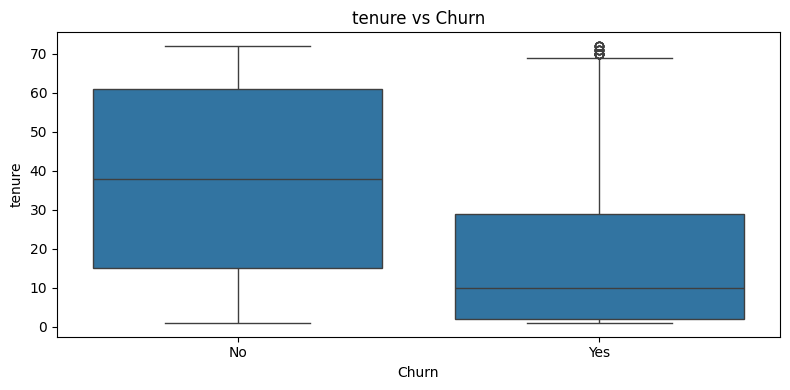

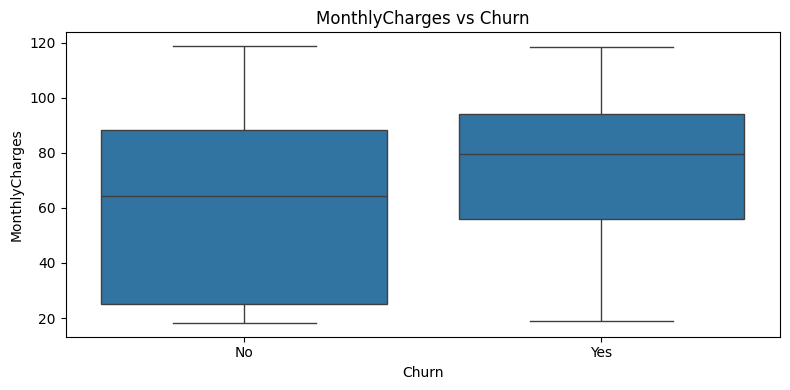

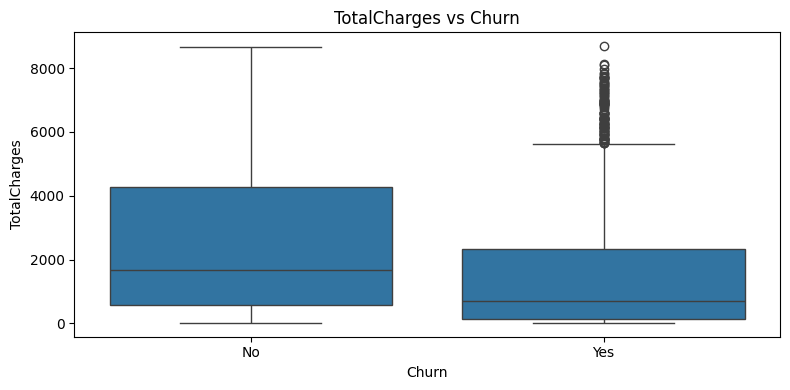

In [9]:
# Boxplots vs churn
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.tight_layout()
    plt.savefig(f"../results/figures/{col}_boxplot.png")
    plt.show()

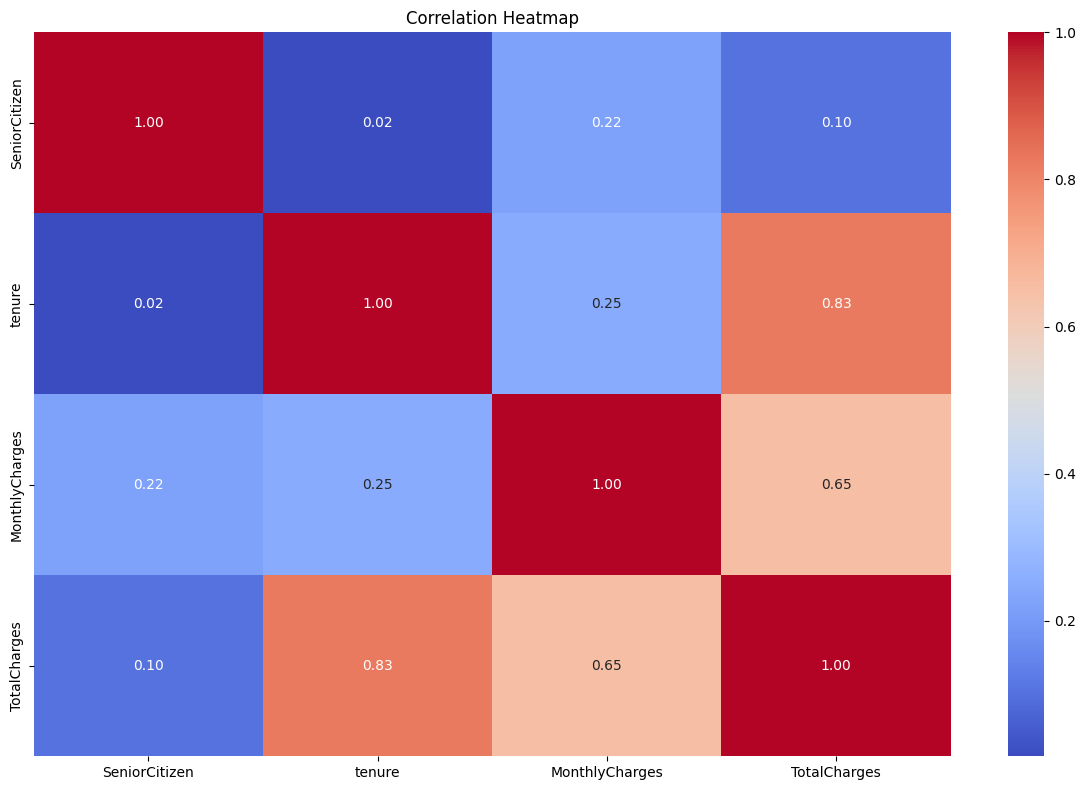

In [10]:
# Correlation heatmap
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("../results/figures/correlation_heatmap.png")
plt.show()

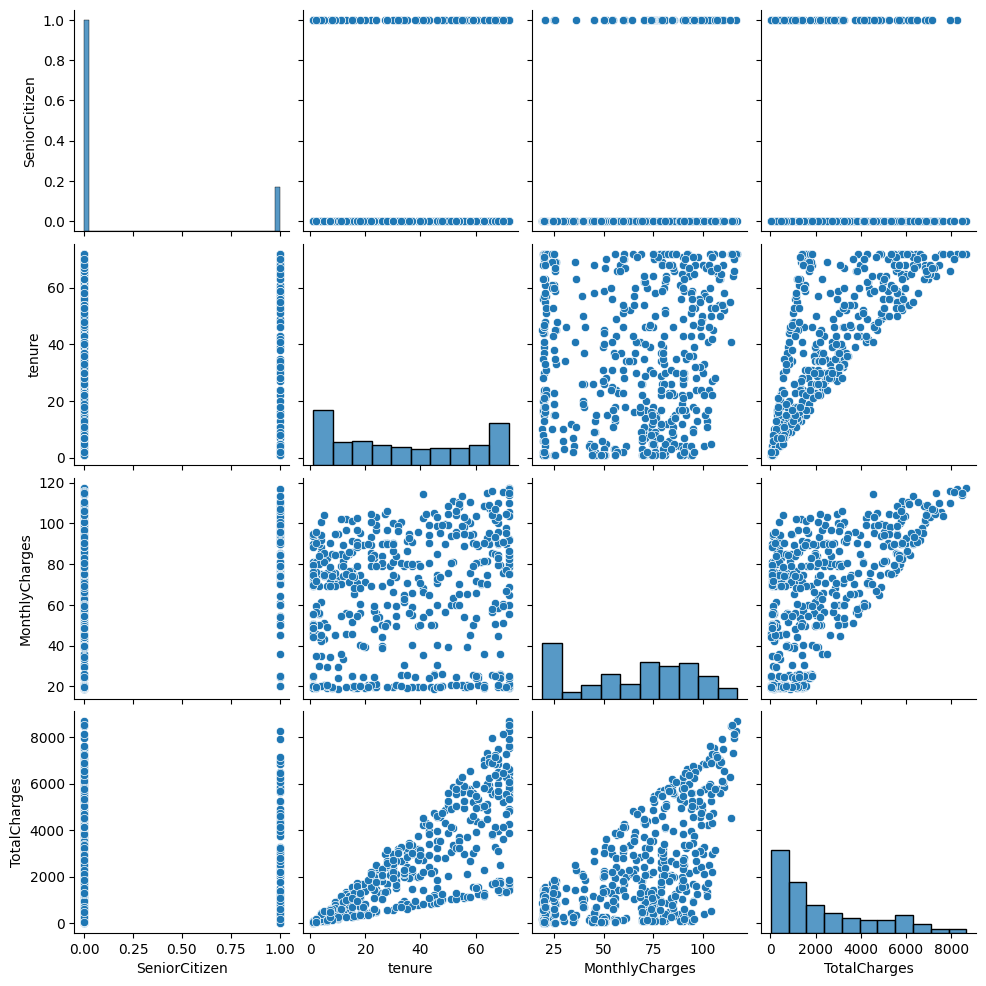

In [12]:
# Pairplot 
sample_n = min(500, len(df))
sns.pairplot(df[numeric_cols].dropna().sample(sample_n, random_state=42))
plt.savefig("../results/figures/pairplot.png")
plt.show()